In [15]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [16]:
load_dotenv()

model = ChatOpenAI()

In [17]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [18]:
def generate_joke(state: JokeState) -> JokeState:
    prompt = f'Generate a dark humor joke on the topic: {state["topic"]}'
    response = model.invoke(prompt).content
    
    return {'joke': response} #type: ignore

In [19]:
def generate_explanation(state: JokeState) -> JokeState:
    prompt = f'Explain the following joke: {state["joke"]}'
    response = model.invoke(prompt).content
    
    return {'explanation': response} #type: ignore

In [20]:
# create graph
graph = StateGraph(JokeState)

# add nodes
graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

# add edges
graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

# add checkpointer
checkpointer = InMemorySaver()

# compile graph
workflow = graph.compile(checkpointer=checkpointer)

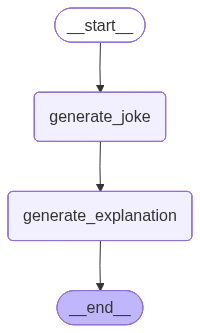

In [21]:
workflow

In [22]:
# thread
config1 = {'configurable': {'thread_id':'1'}}

# initial state
initial_state = {'topic': 'boys and girl'}

final_state = workflow.invoke(initial_state, config=config1) #type: ignore

In [23]:
final_state['joke']

"Why did the boy bring a ladder to the girls' school dance? \nBecause he heard they were looking for someone to fall for."

In [ ]:
workflow.get_state(config1) # type: ignore

StateSnapshot(values={'topic': 'boys and girl', 'joke': "Why did the boy bring a ladder to the girls' school dance? \nBecause he heard they were looking for someone to fall for.", 'explanation': 'This joke plays on the double meaning of the phrase "fall for." When someone "falls for" someone else, it means they develop feelings for that person. In this case, the boy thinks that the girls at the dance are looking for someone to physically fall for (as in, trip or stumble), so he brings a ladder to try to prevent himself from falling. It\'s a play on words that sets up a humorous scenario.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f094564-ae89-6ab7-8002-6a1ef41346f0'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-18T06:11:19.334162+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f094564-a416-6c8b-8001-87a353a7448c'}}, tasks=(), interrupts=())

In [25]:
list(workflow.get_state_history(config1)) # type: ignore

[StateSnapshot(values={'topic': 'boys and girl', 'joke': "Why did the boy bring a ladder to the girls' school dance? \nBecause he heard they were looking for someone to fall for.", 'explanation': 'This joke plays on the double meaning of the phrase "fall for." When someone "falls for" someone else, it means they develop feelings for that person. In this case, the boy thinks that the girls at the dance are looking for someone to physically fall for (as in, trip or stumble), so he brings a ladder to try to prevent himself from falling. It\'s a play on words that sets up a humorous scenario.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f094564-ae89-6ab7-8002-6a1ef41346f0'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-18T06:11:19.334162+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f094564-a416-6c8b-8001-87a353a7448c'}}, tasks=(), interrupts=()),
 StateSnaps

In [ ]:
# time travel to the first node
workflow.update_state({'configurable': {'thread_id':'1', 'checkpoint_id':'1f094564-9216-69cd-8000-1ec9ee7f1998','checkpoint_ns': ''}}, {'topic':'gender equality'}) # type: ignore

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f094591-fdff-6682-8001-68d04f65b67a'}}

In [28]:
list(workflow.get_state_history(config1)) # type: ignore

[StateSnapshot(values={'topic': 'gender equality'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f094591-fdff-6682-8001-68d04f65b67a'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-09-18T06:31:35.625689+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f094564-9216-69cd-8000-1ec9ee7f1998'}}, tasks=(PregelTask(id='1dac3b5f-f8f8-ca73-26ff-c5f7bb661665', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'boys and girl', 'joke': "Why did the boy bring a ladder to the girls' school dance? \nBecause he heard they were looking for someone to fall for.", 'explanation': 'This joke plays on the double meaning of the phrase "fall for." When someone "falls for" someone else, it means they develop feelings for that person. In this case, the boy t

In [29]:
workflow.invoke(None, {'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f094591-fdff-6682-8001-68d04f65b67a'}}) # type: ignore

{'topic': 'gender equality',
 'joke': "Why did the feminist bring a ladder to the women's rights march? \nBecause she heard the glass ceiling was unbreakable.",
 'explanation': 'This joke plays on the idea of the "glass ceiling," which is a metaphor used to describe the invisible barriers that prevent women from advancing in their careers and reaching top positions in certain fields. The feminist brings a ladder to the women\'s rights march because she believes that the glass ceiling is unbreakable, so she needs a ladder to climb over it instead. It is a humorous way to highlight the challenges that women face in achieving equality and breaking through societal barriers.'}

In [31]:
list(workflow.get_state_history(config1)) # type: ignore

[StateSnapshot(values={'topic': 'gender equality', 'joke': "Why did the feminist bring a ladder to the women's rights march? \nBecause she heard the glass ceiling was unbreakable.", 'explanation': 'This joke plays on the idea of the "glass ceiling," which is a metaphor used to describe the invisible barriers that prevent women from advancing in their careers and reaching top positions in certain fields. The feminist brings a ladder to the women\'s rights march because she believes that the glass ceiling is unbreakable, so she needs a ladder to climb over it instead. It is a humorous way to highlight the challenges that women face in achieving equality and breaking through societal barriers.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f094596-3abb-6ae4-8003-cdd6b0bc07e2'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-09-18T06:33:29.368445+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_n